       accel_x   accel_y   accel_z  accel_magnitude  falls
0     0.177701  0.874517  0.279084         0.935011      0
1     8.664656  4.350235 -7.708436        12.386315      1
2     0.380198 -1.203201 -1.690672         2.109648      0
3     0.610586 -1.042044 -0.978500         1.554391      0
4     0.559790 -0.487203  2.755218         2.853411      0
...        ...       ...       ...              ...    ...
1995 -0.284875  0.782630  0.822066         1.170238      0
1996  9.743820  4.975767 -7.127847        13.057813      1
1997 -0.241497  1.202451  0.324036         1.268546      0
1998 -0.061764 -1.095271  0.824103         1.372071      0
1999  0.479442 -3.176704 -0.164149         3.216871      0

[2000 rows x 5 columns]
Confusion Matrix:
[[203   0]
 [  0 197]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


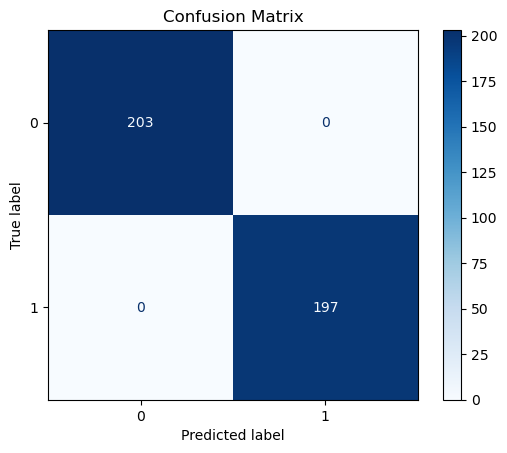


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       203
           1       1.00      1.00      1.00       197

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



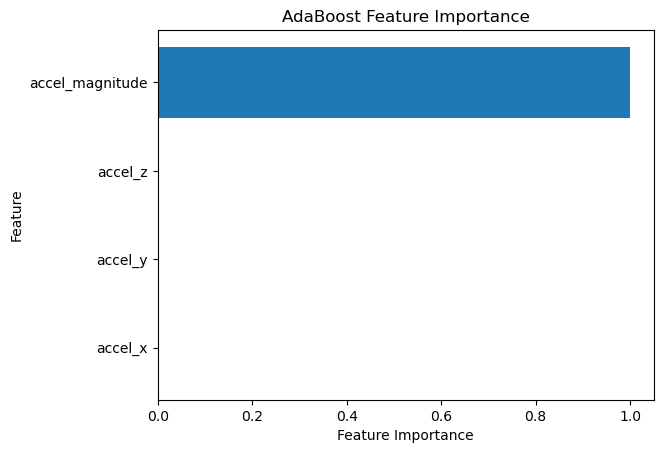

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1️⃣ Simulated Accelerometer Data (Replace with real data)
np.random.seed(42)
num_samples = 2000  # 2000 readings
falls = np.random.randint(0, 2, num_samples)  # 0 = No Fall, 1 = Fall

# Simulate accelerometer readings (Replace with real sensor data)
accel_x = np.random.normal(0, 1, num_samples) + falls * 10  # Adding high spikes for falls
accel_y = np.random.normal(0, 1, num_samples) + falls * 5
accel_z = np.random.normal(0, 1, num_samples) - falls * 8

# 2️⃣ Feature Extraction
data = pd.DataFrame({
    "accel_x": accel_x,
    "accel_y": accel_y,
    "accel_z": accel_z,
    "accel_magnitude": np.sqrt(accel_x**2 + accel_y**2 + accel_z**2),  # Total acceleration
    "falls": falls
})

print(data)

X = data.drop(columns=["falls"])  # Features
y = data["falls"]  # Labels

# 3️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4️⃣ Train Decision Tree + AdaBoost
dt = DecisionTreeClassifier(max_depth=3)  # Shallow tree to avoid overfitting
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(X_train, y_train)

# 5️⃣ Model Evaluation
y_pred = adaboost.predict(X_test)

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 6️⃣ Visualizing Feature Importance
feature_importances = adaboost.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("AdaBoost Feature Importance")
plt.show()